## High Schools dataset cleaning and exploration

In this notebook we will clean and explore the [2017 High Schools dataset](https://data.cityofnewyork.us/Education/DOE-High-School-Directory-2017/s3k6-pzi2) by the NYC Department of Education.

Let's start by opening and examining it.

In [1]:
import pandas as pd

all_high_schools = pd.read_csv('data/DOE_High_School_Directory_2017.csv')
all_high_schools.shape

(440, 453)

In [2]:
pd.set_option('display.max_columns', 453)
all_high_schools.head(3)

,dbn,school_name,boro,overview_paragraph,school_10th_seats,academicopportunities1,academicopportunities2,academicopportunities3,academicopportunities4,academicopportunities5,ell_programs,language_classes,advancedplacement_courses,diplomaendorsements,neighborhood,shared_space,campus_name,building_code,location,phone_number,fax_number,school_email,website,subway,bus,grades2018,finalgrades,total_students,start_time,end_time,addtl_info1,extracurricular_activities,psal_sports_boys,psal_sports_girls,psal_sports_coed,school_sports,graduation_rate,attendance_rate,pct_stu_enough_variety,college_career_rate,pct_stu_safe,girls,boys,pbat,international,specialized,transfer,ptech,earlycollege,geoeligibility,school_accessibility_description,prgdesc1,prgdesc2,prgdesc3,prgdesc4,prgdesc5,prgdesc6,prgdesc7,prgdesc8,prgdesc9,prgdesc10,directions1,directions2,directions3,directions4,directions5,directions6,directions7,directions8,directions9,directions10,requirement1_1,requirement1_2,requirement1_3,requirement1_4,requirement1_5,requirement1_6,requirement1_7,requirement1_8,requirement1_9,requirement1_10,requirement2_1,requirement2_2,requirement2_3,requirement2_4,requirement2_5,requirement2_6,requirement2_7,requirement2_8,requirement2_9,requirement2_10,requirement3_1,requirement3_2,requirement3_3,requirement3_4,requirement3_5,requirement3_6,requirement3_7,requirement3_8,requirement3_9,requirement3_10,requirement4_1,requirement4_2,requirement4_3,requirement4_4,requirement4_5,requirement4_6,requirement4_7,requirement4_8,requirement4_9,requirement4_10,requirement5_1,requirement5_2,requirement5_3,requirement5_4,requirement5_5,requirement5_6,requirement5_7,requirement5_8,requirement5_9,requirement5_10,requirement6_1,requirement6_2,requirement6_3,requirement6_4,requirement6_5,requirement6_6,requirement6_7,requirement6_8,requirement6_9,requirement6_10,requirement7_1,requirement7_2,requirement7_3,requirement7_4,requirement7_5,requirement7_6,requirement7_7,requirement7_8,requirement7_9,requirement7_10,requirement8_1,requirement8_2,requirement8_3,requirement8_4,requirement8_5,requirement8_6,requirement8_7,requirement8_8,requirement8_9,requirement8_10,requirement9_1,requirement9_2,requirement9_3,requirement9_4,requirement9_5,requirement9_6,requirement9_7,requirement9_8,requirement9_9,requirement9_10,requirement10_1,requirement10_2,requirement10_3,requirement10_4,requirement10_5,requirement10_6,requirement10_7,requirement10_8,requirement10_9,requirement10_10,requirement11_1,requirement11_2,requirement11_3,requirement11_4,requirement11_5,requirement11_6,requirement11_7,requirement11_8,requirement11_9,requirement11_10,requirement12_1,requirement12_2,requirement12_3,requirement12_4,requirement12_5,requirement12_6,requirement12_7,requirement12_8,requirement12_9,requirement12_10,offer_rate1,offer_rate2,offer_rate3,offer_rate4,offer_rate5,offer_rate6,offer_rate7,offer_rate8,offer_rate9,offer_rate10,program1,program2,program3,program4,program5,program6,program7,program8,program9,program10,code1,code2,code3,code4,code5,code6,code7,code8,code9,code10,interest1,interest2,interest3,interest4,interest5,interest6,interest7,interest8,interest9,interest10,method1,method2,method3,method4,method5,method6,method7,method8,method9,method10,seats9ge1,seats9ge2,seats9ge3,seats9ge4,seats9ge5,seats9ge6,seats9ge7,seats9ge8,seats9ge9,seats9ge10,grade9gefilledflag1,grade9gefilledflag2,grade9gefilledflag3,grade9gefilledflag4,grade9gefilledflag5,grade9gefilledflag6,grade9gefilledflag7,grade9gefilledflag8,grade9gefilledflag9,grade9gefilledflag10,grade9geapplicants1,grade9geapplicants2,grade9geapplicants3,grade9geapplicants4,grade9geapplicants5,grade9geapplicants6,grade9geapplicants7,grade9geapplicants8,grade9geapplicants9,grade9geapplicants10,seats9swd1,seats9swd2,seats9swd3,seats9swd4,seats9swd5,seats9swd6,seats9swd7,seats9swd8,seats9swd9,seats9swd10,grade9swdfilledflag1,grade9swdfilledflag2,grade9swdfilledflag3,grade9swdfilledflag4,grade9swdfilledflag5,grade9swdfilledflag6,grade9swdfilled

As ou can see there are over 400 columns so let's keep only columns of interest.

Also notice that the `boys` column is a flag for boys-only schools. Since we are trying to help solving the problem of women in tech it wouldn't make sense to keep them - let's filter them out.

In [3]:
boys_only = all_high_schools['boys'] == 1

columns_of_interest = ['dbn', 'school_name', 'boro', 'academicopportunities1', 
                       'academicopportunities2', 'academicopportunities3',
                       'academicopportunities4', 'academicopportunities5', 'neighborhood', 
                       'location', 'subway', 'bus', 'total_students', 'start_time', 'end_time',
                       'graduation_rate', 'attendance_rate', 'pct_stu_enough_variety',
                       'college_career_rate', 'girls', 'specialized', 'earlycollege',
                       'program1', 'program2', 'program3', 'program4', 'program5', 'program6',
                       'program7', 'program8', 'program9', 'program10', 'interest1',
                       'interest2', 'interest3', 'interest4', 'interest5', 'interest6',
                       'interest7', 'interest8', 'interest9', 'interest10', 'city', 'zip']

df = all_high_schools[~boys_only][columns_of_interest]
df.set_index('dbn', inplace=True)
df.shape

(436, 43)

In [4]:
df.head(3)

,school_name,boro,academicopportunities1,academicopportunities2,academicopportunities3,academicopportunities4,academicopportunities5,neighborhood,location,subway,bus,total_students,start_time,end_time,graduation_rate,attendance_rate,pct_stu_enough_variety,college_career_rate,girls,specialized,earlycollege,program1,program2,program3,program4,program5,program6,program7,program8,program9,program10,interest1,interest2,interest3,interest4,interest5,interest6,interest7,interest8,interest9,interest10,city,zip
dbn,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
31R455,Tottenville High School,R,"Institute Programs: Science, Classics/Humanities",Honors Program for grades 9-12,ROTC Program,CTE Programs,Visual and Performing Arts Programs,Annadale-Huguenot-Princes Bay,"100 Luten Avenue, Staten Island NY 10312 (40.5...",SIR to Huguenot,"S55, S56, S59, S78, X17, X17J, X19",3907,8am,2:20pm,0.860,0.91,0.85,0.690,NaN,NaN,NaN,Marine Corps Junior Reserve Officers Training...,Classics Institute,Science Institute,Zoned,NaN,NaN,NaN,NaN,NaN,NaN,JROTC,Humanities & Interdisciplinary,Science & Math,Zoned,NaN,NaN,NaN,NaN,NaN,NaN,Staten Island,10312
30Q450,Long Island City High School,Q,CTE program(s) in: Hospitality and Tourism,iLearnNYC: Program for expanded online coursew...,Eight Small Learning Communities: Culinary; Re...,Future Educators; Sports Medicine; Broadway Pr...,"Art, Music, Computers, Theater, Technology; CU...",Astoria,"14-30 Broadway, Astoria NY 11106 (40.765881, -...","N, Q to Broadway","Q100, Q102, Q103, Q104, Q18, Q19, Q66, Q69",2077,8:29am,3:50pm,0.648,0.80,0.89,0.481,NaN,NaN,NaN,Culinary Institute,Academy of Restaurant and Hotel Management,Sports Medicine & Health Sciences,Community & Culture,Broadway Productions,Global Languages Academy,Dual Language Spanish Program,Zoned,NaN,NaN,Culinary Arts,"Hospitality, Travel and Tourism",Health Professions,Law & Government,Performing Arts/Visual Art & Design,"Hospitality, Travel and Tourism",Humanities & Interdisciplinary,Zoned,NaN,NaN,Astoria,11106
30Q445,William Cullen Bryant High School,Q,"CTE program(s) in: Business, Management & Admi...",iLearnNYC: Program for expanded online coursew...,"Accounting, Entrepreneurship and Marketing, Ar...","Environmental Science, Executive Internship, G...","Intel Math/Science Research, Jazz Band, Law & ...",Astoria,"48-10 31st Avenue, Astoria NY 11103 (40.757072...","M, R to 46th St","Q101, Q104, Q18, Q66",2437,8:50am,3:29pm,0.683,0.88,0.83,0.522,NaN,NaN,NaN,Forensic Science and Law Academy,Business and Technology Institute,Arts and Humanities Institute,Math and Science Academy,Zoned,NaN,NaN,NaN,NaN,NaN,Law & Government,Business,Humanities & Interdisciplinary,Science & Math,Zoned,NaN,NaN,NaN,NaN,NaN,Astoria,11103


Let's now make a quick comparison of `college_career_rate` in girls-only schools vs mixed ones.

In [5]:
df['all'] = ""
df['girls'] = df['girls'].map({1: 'Girls-only'})
df['girls'].fillna('Mixed', inplace=True)

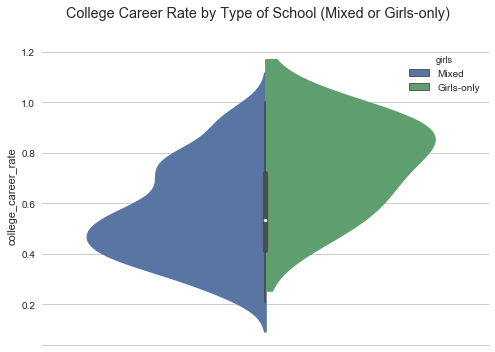

In [6]:
%matplotlib inline
import pylab as plt
import seaborn as sns

sns.set(style="whitegrid", color_codes=True)
ax = sns.violinplot(data=df, x='all', y="college_career_rate", hue="girls", split=True)
sns.despine(left=True)

ax.set_xlabel("")
plt.suptitle('College Career Rate by Type of School (Mixed or Girls-only)')

plt.savefig('figures/girls-only.png', bbox_inches='tight')

Now notice that there are 5 columns on "academic opportunities", 10 columns on "programs", and 10 more columns on "interests", and that in each of these areas some schools might have something that is tech-related. For each school, let's try to find whether we can find some tech related words in any of those areas and let's call it "tech inclination".

In [7]:
import numpy as np

def contains_terms(column_name, terms=["tech"]):
    """Checks if at least one of the terms is present in the given column."""
    contains = []
    for i, term in enumerate(terms):
        contains.append(df[column_name].str.contains(terms[i], case=False))

    not_null = df[column_name].notnull()
    return (not_null) & (np.any(contains, axis=0))
    

def contains_terms_columns(column_root, n_columns, terms=["tech"]):
    """Checks if at least one of the terms is present in the columns given by its root name."""
    if n_columns == 1:
        return contains_terms(column_root, terms)
    
    tech = []
    for i in range(n_columns):
        column_name = column_root + str(i + 1)
        tech.append(contains_terms(column_name, terms))
    
    return np.any(tech, axis=0)

In [8]:
tech_academicopportunities = contains_terms_columns('academicopportunities', 5, 
                                                    terms=['technology', 'computer', 'web', 
                                                           'programming', 'coding'])
len(df[tech_academicopportunities])

177

In [9]:
# searching for 'tech' might match the word 'technical' 
all_tech_program = contains_terms_columns('program', 10, terms=['programming', 'computer', 
                                                                'tech'])
technical_program = contains_terms_columns('program', 10, terms=['technical'])
tech_program = (all_tech_program) & ~(technical_program)
len(df[tech_program])

71

In [10]:
tech_interest = contains_terms_columns('interest', 10, terms=['computer', 'technology'])
len(df[tech_interest])

43

In [11]:
tech_inclined = (tech_academicopportunities) | (tech_program) | (tech_interest)
print(len(df[tech_inclined]))
print("{:.1f}%".format(100 * len(df[tech_inclined]) / len(df)))

200
45.9%


Since 46% of schools are tech inclined and our assumption here was that 200 high schools were enough let's use only tech-inclined schools going forward. It could help the canvassing team if they were talking to female students from schools that have some tech-inclination.

However, let's first see how schools compare with each other taking that into consideration.

In [12]:
df['tech_academicopportunities'] = tech_academicopportunities.astype(int)
df['tech_program'] = tech_program.astype(int)
df['tech_interest'] = tech_interest.astype(int)
df.head(3)

,school_name,boro,academicopportunities1,academicopportunities2,academicopportunities3,academicopportunities4,academicopportunities5,neighborhood,location,subway,bus,total_students,start_time,end_time,graduation_rate,attendance_rate,pct_stu_enough_variety,college_career_rate,girls,specialized,earlycollege,program1,program2,program3,program4,program5,program6,program7,program8,program9,program10,interest1,interest2,interest3,interest4,interest5,interest6,interest7,interest8,interest9,interest10,city,zip,all,tech_academicopportunities,tech_program,tech_interest
dbn,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
31R455,Tottenville High School,R,"Institute Programs: Science, Classics/Humanities",Honors Program for grades 9-12,ROTC Program,CTE Programs,Visual and Performing Arts Programs,Annadale-Huguenot-Princes Bay,"100 Luten Avenue, Staten Island NY 10312 (40.5...",SIR to Huguenot,"S55, S56, S59, S78, X17, X17J, X19",3907,8am,2:20pm,0.860,0.91,0.85,0.690,Mixed,NaN,NaN,Marine Corps Junior Reserve Officers Training...,Classics Institute,Science Institute,Zoned,NaN,NaN,NaN,NaN,NaN,NaN,JROTC,Humanities & Interdisciplinary,Science & Math,Zoned,NaN,NaN,NaN,NaN,NaN,NaN,Staten Island,10312,,0,0,0
30Q450,Long Island City High School,Q,CTE program(s) in: Hospitality and Tourism,iLearnNYC: Program for expanded online coursew...,Eight Small Learning Communities: Culinary; Re...,Future Educators; Sports Medicine; Broadway Pr...,"Art, Music, Computers, Theater, Technology; CU...",Astoria,"14-30 Broadway, Astoria NY 11106 (40.765881, -...","N, Q to Broadway","Q100, Q102, Q103, Q104, Q18, Q19, Q66, Q69",2077,8:29am,3:50pm,0.648,0.80,0.89,0.481,Mixed,NaN,NaN,Culinary Institute,Academy of Restaurant and Hotel Management,Sports Medicine & Health Sciences,Community & Culture,Broadway Productions,Global Languages Academy,Dual Language Spanish Program,Zoned,NaN,NaN,Culinary Arts,"Hospitality, Travel and Tourism",Health Professions,Law & Government,Performing Arts/Visual Art & Design,"Hospitality, Travel and Tourism",Humanities & Interdisciplinary,Zoned,NaN,NaN,Astoria,11106,,1,0,0
30Q445,William Cullen Bryant High School,Q,"CTE program(s) in: Business, Management & Admi...",iLearnNYC: Program for expanded online coursew...,"Accounting, Entrepreneurship and Marketing, Ar...","Environmental Science, Executive Internship, G...","Intel Math/Science Research, Jazz Band, Law & ...",Astoria,"48-10 31st Avenue, Astoria NY 11103 (40.757072...","M, R to 46th St","Q101, Q104, Q18, Q66",2437,8:50am,3:29pm,0.683,0.88,0.83,0.522,Mixed,NaN,NaN,Forensic Science and Law Academy,Business and Technology Institute,Arts and Humanities Institute,Math and Science Academy,Zoned,NaN,NaN,NaN,NaN,NaN,Law & Government,Business,Humanities & Interdisciplinary,Science & Math,Zoned,NaN,NaN,NaN,NaN,NaN,Astoria,11103,,0,1,0


In [13]:
def fill_tech_summary(academicopportunities, program, interest):
    if academicopportunities:
        if program:
            if interest:
                return 'tech_academicopportunities+program+interest'
            else:
                return 'tech_academicopportunities+program'
            
        elif interest:
            return 'tech_academicopportunities+interest'
        else:
            return 'tech_academicopportunities'
    elif program:
        if interest:
                return 'tech_program+interest'
        else:
            return 'tech_program'
    elif interest:
        return 'tech_interest'
    else:
        return 'no_tech_inclination'

In [14]:
df['tech_summary'] = df.apply(lambda x: fill_tech_summary(x.loc['tech_academicopportunities'],
                                                          x.loc['tech_program'],
                                                          x.loc['tech_interest']), 
                              axis='columns')
df['tech_summary'].head()

dbn
31R455           no_tech_inclination
30Q450    tech_academicopportunities
30Q445                  tech_program
30Q501    tech_academicopportunities
26Q430           no_tech_inclination
Name: tech_summary, dtype: object

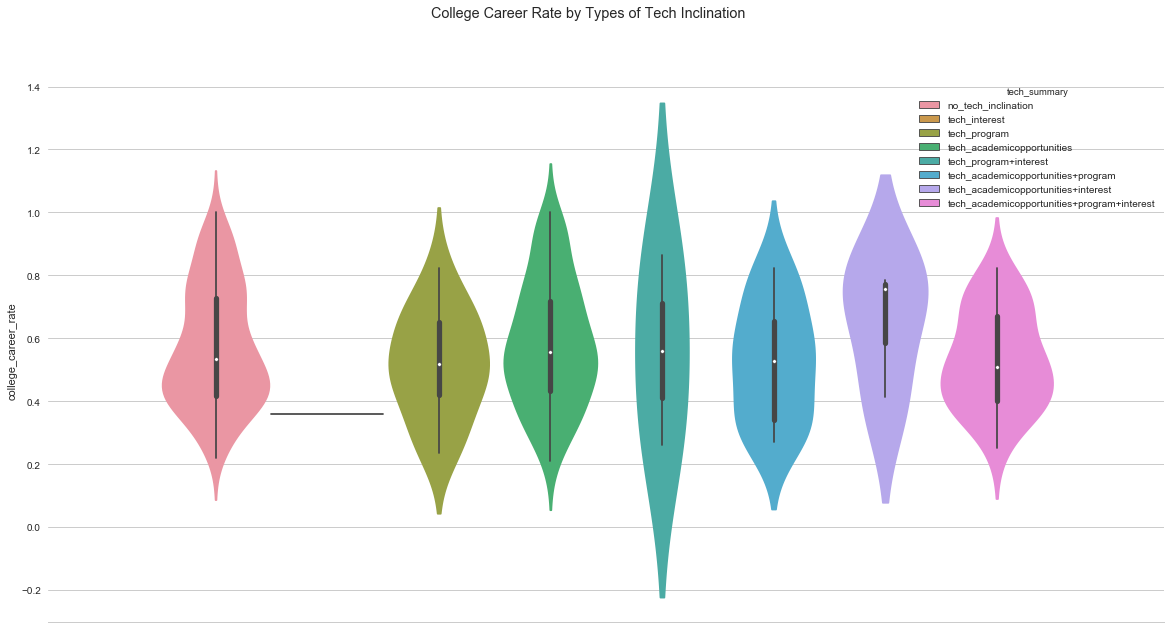

In [15]:
fig, ax = plt.subplots(figsize=(20, 10))

ax = sns.violinplot(data=df, x='all', y="college_career_rate", hue="tech_summary", ax=ax,
                    hue_order=['no_tech_inclination', 'tech_interest', 'tech_program', 
                               'tech_academicopportunities', 'tech_program+interest',
                               'tech_academicopportunities+program',
                               'tech_academicopportunities+interest', 
                               'tech_academicopportunities+program+interest'])
sns.despine(left=True)
ax.set_xlabel("")
plt.suptitle('College Career Rate by Types of Tech Inclination')

plt.savefig('figures/types-tech-inclination.png', bbox_inches='tight')

In [16]:
def fill_tech_summary_compact(academicopportunities, program, interest):
    if academicopportunities or program or interest:
        return 'tech_inclined'
    else:
        return 'not_tech_inclined'

In [17]:
df['tech_summary_compact'] = df.apply(lambda x: fill_tech_summary_compact(
                                                          x.loc['tech_academicopportunities'],
                                                          x.loc['tech_program'],
                                                          x.loc['tech_interest']), 
                              axis='columns')
df['tech_summary_compact'].head()

dbn
31R455    not_tech_inclined
30Q450        tech_inclined
30Q445        tech_inclined
30Q501        tech_inclined
26Q430    not_tech_inclined
Name: tech_summary_compact, dtype: object

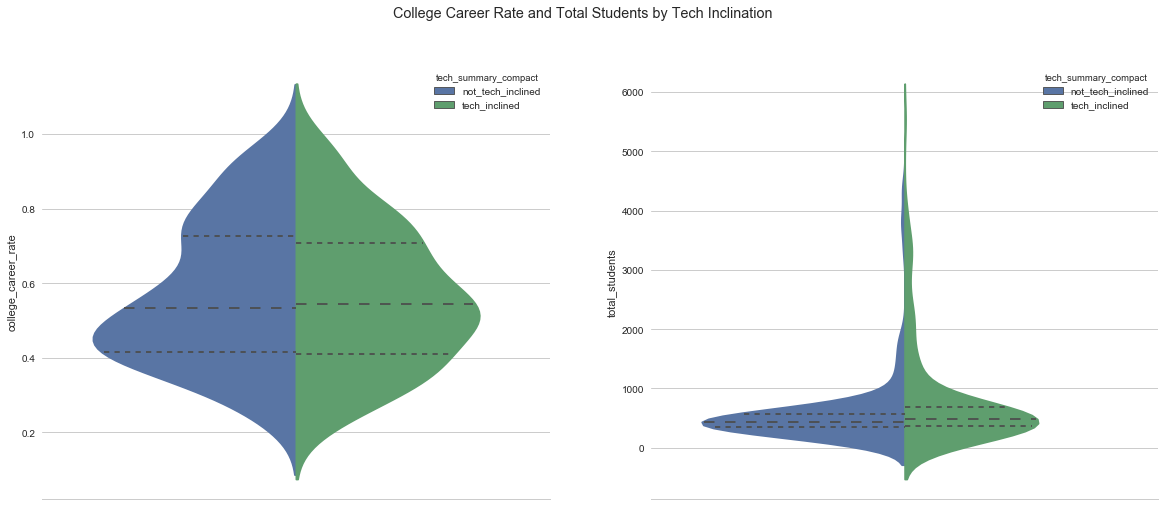

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

ax1 = sns.violinplot(data=df, x='all', y="college_career_rate", hue="tech_summary_compact",
                     split=True, inner="quartile", ax=ax1)

ax2 = sns.violinplot(data=df, x='all', y="total_students", hue="tech_summary_compact", 
                     split=True, inner="quartile", ax=ax2)

ax1.set_xlabel("")
ax2.set_xlabel("")
sns.despine(left=True)
plt.suptitle('College Career Rate and Total Students by Tech Inclination')

plt.savefig('figures/breakdown-tech-inclination.png', bbox_inches='tight')

We can see from the violin plots above that even though tech inclined high schools have a sligtly higher college career rate median, they have slightly lower 25% and 75% quartiles. On the other hand, most high schools with 1500 or more students seem to have some kind of tech inclination.

In [19]:
new_columns = ['school_name', 'boro', 'tech_academicopportunities', 'neighborhood', 'location',
               'subway', 'bus', 'total_students', 'start_time', 'end_time', 'graduation_rate',
               'attendance_rate', 'pct_stu_enough_variety', 'college_career_rate', 'girls',
               'specialized', 'earlycollege', 'tech_program', 'tech_interest', 'city', 'zip']
tech_schools = df[tech_inclined][new_columns]
tech_schools.head(3)

,school_name,boro,tech_academicopportunities,neighborhood,location,subway,bus,total_students,start_time,end_time,graduation_rate,attendance_rate,pct_stu_enough_variety,college_career_rate,girls,specialized,earlycollege,tech_program,tech_interest,city,zip
dbn,,,,,,,,,,,,,,,,,,,,,
30Q450,Long Island City High School,Q,1,Astoria,"14-30 Broadway, Astoria NY 11106 (40.765881, -...","N, Q to Broadway","Q100, Q102, Q103, Q104, Q18, Q19, Q66, Q69",2077,8:29am,3:50pm,0.648,0.80,0.89,0.481,Mixed,NaN,NaN,0,0,Astoria,11106
30Q445,William Cullen Bryant High School,Q,0,Astoria,"48-10 31st Avenue, Astoria NY 11103 (40.757072...","M, R to 46th St","Q101, Q104, Q18, Q66",2437,8:50am,3:29pm,0.683,0.88,0.83,0.522,Mixed,NaN,NaN,1,0,Astoria,11103
30Q501,Frank Sinatra School of the Arts High School,Q,1,Astoria,"35-12 35th Avenue, Astoria NY 11106 (40.756099...","M, R to Steinway St ; N, Q to 36 Ave-Washingto...","Q101, Q102, Q104, Q66",828,7:45am,3:15pm,0.971,0.95,0.80,0.958,Mixed,NaN,NaN,0,0,Astoria,11106


Let's now shift our focus to the `graduation_rate` and `college_career_rate` columns. In particular, `college_career_rate`'s definition is "at the end of the 2014-15 school year, the percent of students who graduated 'on time' by earning a diploma four years after they entered 9th grade".

We could multiply that by the total number of students in each school and calculate the potential number of college schools each school has. 

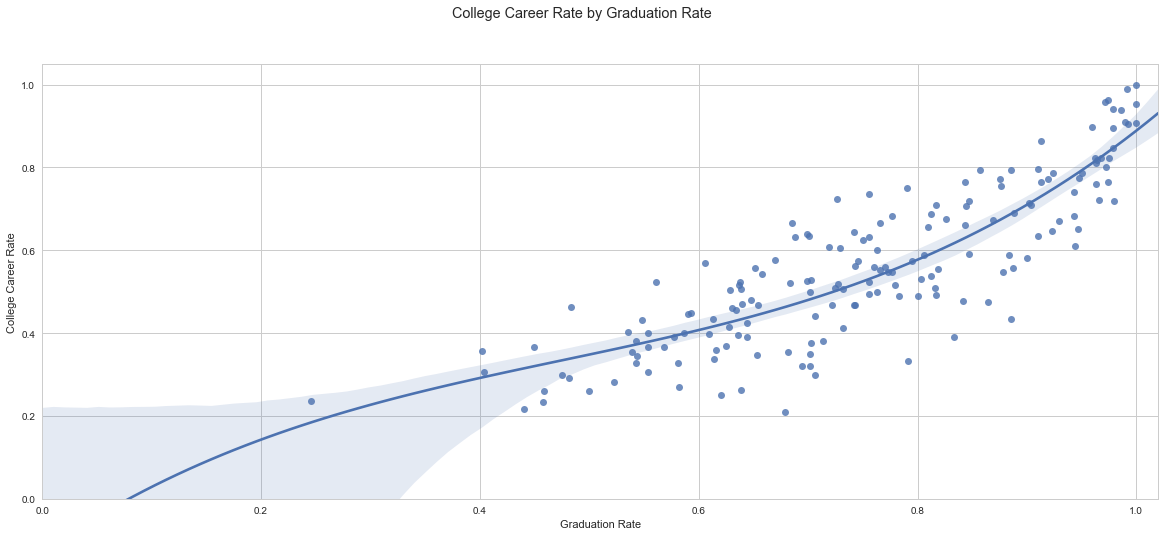

In [20]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.set_xlim(0, 1.02)
ax.set_ylim(0, 1.05)

sns.regplot(tech_schools['graduation_rate'], tech_schools['college_career_rate'], order=3)

ax.set_xlabel('Graduation Rate')
ax.set_ylabel('College Career Rate')
plt.suptitle('College Career Rate by Graduation Rate')

plt.savefig('figures/college-career-and-graduation-rate.png', bbox_inches='tight')

We can see that `graduation_rate` and `college_career_rate` have a strong correlation. That means if we have too many `college_career_rate` null values we can use `graduation_rate` as a proxy.

In [21]:
potential = tech_schools['college_career_rate'] * tech_schools['total_students']
potential.sort_values(inplace=True, ascending=False)
potential

dbn
13K430    5323.708066
22K405    3176.841964
10X445    2976.890066
21K525    2754.464965
26Q495    2548.926093
31R460    2541.000000
03M485    2295.198043
22K425    2135.250016
28Q505    2098.872096
20K445    2000.339082
25Q425    1886.413943
24Q610    1855.872047
31R440    1610.560006
20K505    1604.384984
28Q620    1468.948021
01M539    1442.719025
21K540    1421.774998
31R450    1400.000005
30Q445    1272.114037
04M435    1263.888021
27Q323    1181.424023
31R605    1163.890033
21K410    1144.643964
25Q525    1133.000000
30Q450     999.037012
20K485     985.844019
17K590     947.719988
05M499     939.802994
24Q600     904.050002
24Q455     876.566994
             ...     
14K632      45.320000
16K393      29.414000
26Q315            NaN
10X524            NaN
10X565            NaN
10X264            NaN
19K422            NaN
11X509            NaN
11X508            NaN
29Q313            NaN
08X561            NaN
02M422            NaN
02M282            NaN
02M280            NaN
02M135

In [22]:
null_college_career_rate = tech_schools.college_career_rate.isnull()
print("{:.1f}%".format(100 * len(tech_schools[null_college_career_rate]) / len(tech_schools)))

14.0%


In [23]:
null_graduation_rate = tech_schools.graduation_rate.isnull()
print("{:.1f}%".format(100 * len(tech_schools[null_graduation_rate]) / len(tech_schools)))

11.0%


In [24]:
print("{:.1f}%".format(100 * len(tech_schools[(null_college_career_rate) & \
                                              (null_graduation_rate)]) \
                       / len(tech_schools)))

11.0%


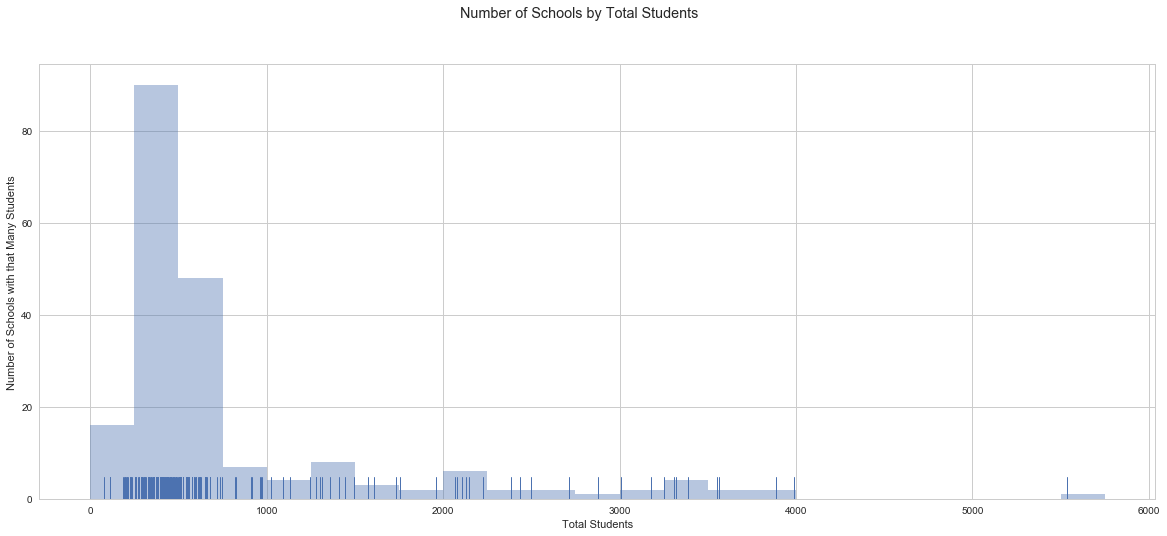

In [25]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.distplot(tech_schools['total_students'], bins=range(0, 6000, 250), kde=False, rug=True)

ax.set_xlabel('Total Students')
ax.set_ylabel('Number of Schools with that Many Students')
plt.suptitle('Number of Schools by Total Students')

In [26]:
tech_schools[(null_college_career_rate) & (null_graduation_rate)]['total_students'].max()

662

It seems that 14% of schools don't have figures on the graduation rate. Let's plot its distribution to help decide if we should either ignore the column or the schools without that data.

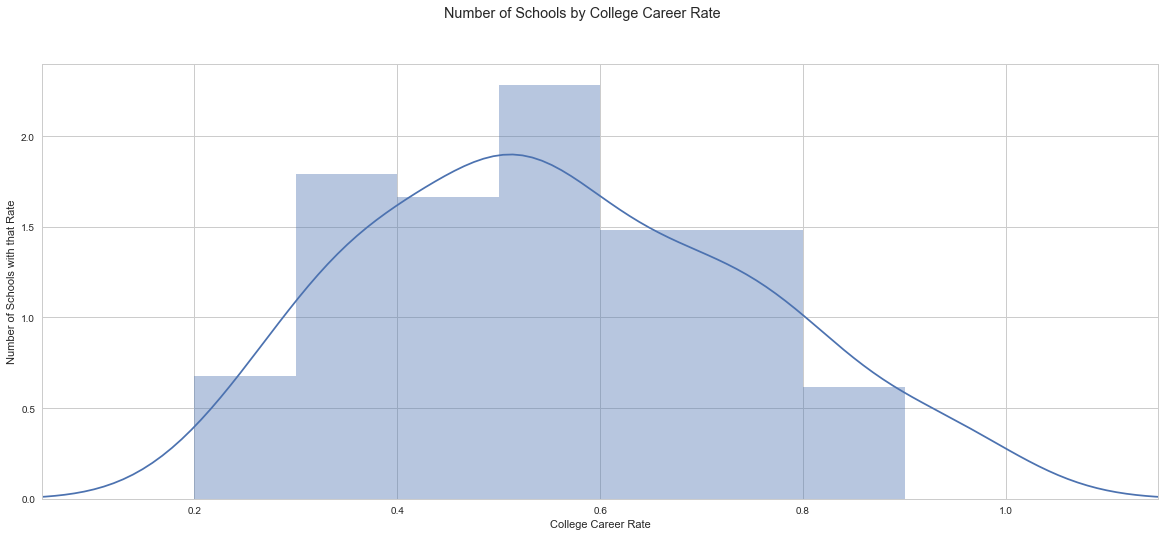

In [27]:
import numpy as np

fig, ax = plt.subplots(figsize=(20, 8))
ax.set_xlim(0.05, 1.15)

schools_to_plot = tech_schools[~(null_college_career_rate)]
sns.distplot(schools_to_plot['college_career_rate'], bins=np.arange(0, 1, 0.1))

ax.set_xlabel('College Career Rate')
ax.set_ylabel('Number of Schools with that Rate')
plt.suptitle('Number of Schools by College Career Rate')

fig.savefig('figures/college-career-rate.png', bbox_inches='tight')

Since some schools have a really low college career rate let's use that data and filter schools that don't have that data point.

Let's do that and also plot the distribution of schools by their number of potential college students.

In [28]:
# Copy to avoid chained indexing and the SettingWithCopy warning (http://bit.ly/2kkXW5B)
tech_col_potential = pd.DataFrame(tech_schools, copy=True)
tech_col_potential.dropna(subset=['college_career_rate'], inplace=True)

tech_col_potential['potential_college_students'] = (tech_col_potential['total_students'] *\
                                                    tech_col_potential['college_career_rate'])\
                                                .astype(int)

tech_col_potential.sort_values('potential_college_students', inplace=True, ascending=False)
tech_col_potential.head(3)

,school_name,boro,tech_academicopportunities,neighborhood,location,subway,bus,total_students,start_time,end_time,graduation_rate,attendance_rate,pct_stu_enough_variety,college_career_rate,girls,specialized,earlycollege,tech_program,tech_interest,city,zip,potential_college_students
dbn,,,,,,,,,,,,,,,,,,,,,,
13K430,Brooklyn Technical High School,K,1,Fort Greene,"29 Ft Greene Place, Brooklyn NY 11217 (40.6888...","D, N to Atlantic Ave  Barclays Center; G to F...","B103, B25, B26, B37, B38, B41, B45, B52, B54, ...",5534,8:45am,3:15pm,0.974,0.97,0.89,0.962,Mixed,1.0,NaN,0,0,Brooklyn,11217,5323
22K405,Midwood High School,K,1,Flatbush,"2839 Bedford Avenue, Brooklyn NY 11210 (40.632...","2, 5 to Flatbush Ave  Brooklyn College","B103, B11, B41, B44, B44-SBS, B49, B6, B8, BM1...",3986,8:45am,3:30pm,0.910,0.94,0.92,0.797,Mixed,NaN,NaN,0,0,Brooklyn,11210,3176
10X445,Bronx High School of Science,X,1,Van Cortlandt Village,"75 West 205th Street, Bronx NY 10468 (40.87995...","4 to Bedford Park Blvd - Lehman College ; B, D...","Bx1, Bx10, Bx2, Bx22, Bx26, Bx28, Bx3, Bx38, B...",3010,8am,3:45pm,0.991,0.97,0.92,0.989,Mixed,1.0,NaN,0,0,Bronx,10468,2976


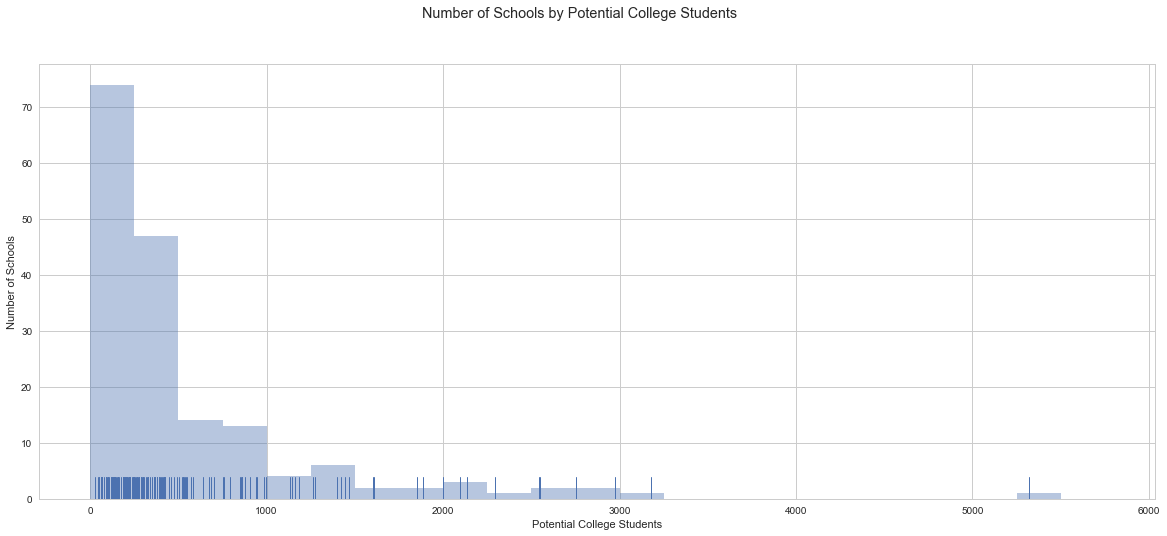

In [29]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.distplot(tech_col_potential['potential_college_students'], bins=range(0, 6000, 250),
             kde=False, rug=True)

ax.set_xlabel('Potential College Students')
ax.set_ylabel('Number of Schools')
plt.suptitle('Number of Schools by Potential College Students')

plt.savefig('figures/potential-college-students.png', bbox_inches='tight')

In [30]:
high_potential = tech_col_potential['potential_college_students'] > 1000
high_potential_schools = tech_col_potential[high_potential]
len(high_potential_schools)

24

There seems to be a big gap in the number of schools with more than 1000 potential college students as compared to the number of schools with fewer potential college students.

Since we want to reduce the number of recommended stations by at least 90% and there are 24 schools with at least 1000 potential college students let's filter those and ignore the other ones.

Next, let's examine the `subway` and  `bus` columns, which tells us which subway and bus lines are near each school.

In [31]:
high_potential_schools.loc[:, ('subway', 'bus')]

,subway,bus
dbn,,
13K430,"D, N to Atlantic Ave  Barclays Center; G to F...","B103, B25, B26, B37, B38, B41, B45, B52, B54, ..."
22K405,"2, 5 to Flatbush Ave  Brooklyn College","B103, B11, B41, B44, B44-SBS, B49, B6, B8, BM1..."
10X445,"4 to Bedford Park Blvd - Lehman College ; B, D...","Bx1, Bx10, Bx2, Bx22, Bx26, Bx28, Bx3, Bx38, B..."
21K525,Q to Ave M,"B11, B49, B6, B68, B9, BM1, BM3, BM4"
26Q495,NaN,"Q13, Q28, Q31, Q76, QM20"
31R460,NaN,"S54, S57, S61, S91, X31"
03M485,"1 to 66th St - Lincoln Center ; 2, A, B, C, D ...","BxM2, M10, M104, M11, M12, M20, M31, M5, M57, ..."
22K425,NaN,"B100, B2, B31, B41, B44, B44-SBS, B49, B7, B82..."
28Q505,"E, J, Z to Jamaica Center - Parsons / Archer ;...","Q1, Q110, Q111, Q112, Q113, Q114, Q17, Q2, Q20..."


In [32]:
high_potential_schools['subway_nearby'] = df.apply(lambda x: 'no subway' if pd.isnull(x['subway'])
                                                       else 'subway nearby', 
                                                   axis='columns')
high_potential_schools['subway_nearby']

dbn
13K430    subway nearby
22K405    subway nearby
10X445    subway nearby
21K525    subway nearby
26Q495        no subway
31R460        no subway
03M485    subway nearby
22K425        no subway
28Q505    subway nearby
20K445    subway nearby
25Q425        no subway
24Q610    subway nearby
31R440        no subway
20K505    subway nearby
28Q620    subway nearby
01M539    subway nearby
21K540    subway nearby
31R450    subway nearby
30Q445    subway nearby
04M435        no subway
27Q323    subway nearby
31R605    subway nearby
21K410    subway nearby
25Q525        no subway
Name: subway_nearby, dtype: object

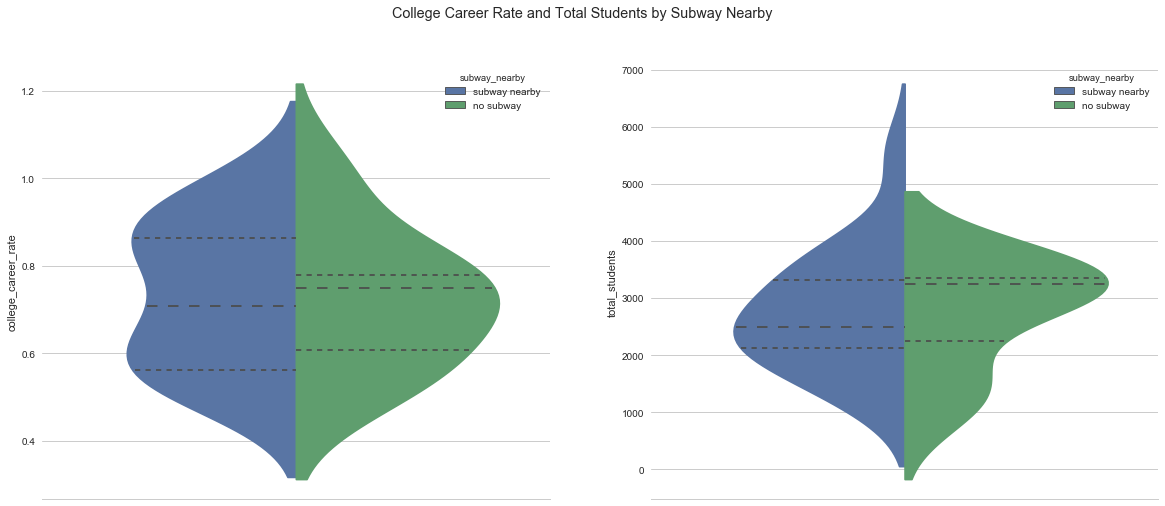

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
high_potential_schools['all'] = ""

ax1 = sns.violinplot(data=high_potential_schools, x='all', y="college_career_rate", 
                     hue="subway_nearby", split=True, inner="quartile", ax=ax1)

ax2 = sns.violinplot(data=high_potential_schools, x='all', y="total_students",
                     hue="subway_nearby", split=True, inner="quartile", ax=ax2)

ax1.set_xlabel("")
ax2.set_xlabel("")
sns.despine(left=True)
plt.suptitle('College Career Rate and Total Students by Subway Nearby')

fig.savefig('figures/subway-vs-no-subway.png', bbox_inches='tight')

Notice how the 75% percentile of college career rate in high schools with a subway nearby is much higher. Also notice that the schools with the highest number of students all seem to have a subway nearby.

Going forward we will filter schools without a subway station nearby.

In [34]:
# Copy to avoid chained indexing and the SettingWithCopy warning (http://bit.ly/2kkXW5B)
close_to_subway = pd.DataFrame(high_potential_schools, copy=True)
close_to_subway.dropna(subset=['subway'], inplace=True)
close_to_subway

,school_name,boro,tech_academicopportunities,neighborhood,location,subway,bus,total_students,start_time,end_time,graduation_rate,attendance_rate,pct_stu_enough_variety,college_career_rate,girls,specialized,earlycollege,tech_program,tech_interest,city,zip,potential_college_students,subway_nearby,all
dbn,,,,,,,,,,,,,,,,,,,,,,,,
13K430,Brooklyn Technical High School,K,1,Fort Greene,"29 Ft Greene Place, Brooklyn NY 11217 (40.6888...","D, N to Atlantic Ave  Barclays Center; G to F...","B103, B25, B26, B37, B38, B41, B45, B52, B54, ...",5534,8:45am,3:15pm,0.974,0.97,0.89,0.962,Mixed,1.0,NaN,0,0,Brooklyn,11217,5323,subway nearby,
22K405,Midwood High School,K,1,Flatbush,"2839 Bedford Avenue, Brooklyn NY 11210 (40.632...","2, 5 to Flatbush Ave  Brooklyn College","B103, B11, B41, B44, B44-SBS, B49, B6, B8, BM1...",3986,8:45am,3:30pm,0.910,0.94,0.92,0.797,Mixed,NaN,NaN,0,0,Brooklyn,11210,3176,subway nearby,
10X445,Bronx High School of Science,X,1,Van Cortlandt Village,"75 West 205th Street, Bronx NY 10468 (40.87995...","4 to Bedford Park Blvd - Lehman College ; B, D...","Bx1, Bx10, Bx2, Bx22, Bx26, Bx28, Bx3, Bx38, B...",3010,8am,3:45pm,0.991,0.97,0.92,0.989,Mixed,1.0,NaN,0,0,Bronx,10468,2976,subway nearby,
21K525,Edward R. Murrow High School,K,1,Midwood,"1600 Avenue L, Brooklyn NY 11230 (40.619671, -...",Q to Ave M,"B11, B49, B6, B68, B9, BM1, BM3, BM4",3885,8:05am,2:45pm,0.817,0.92,0.88,0.709,Mixed,NaN,NaN,0,0,Brooklyn,11230,2754,subway nearby,
03M485,Fiorello H. LaGuardia High School of Music & A...,M,1,Lincoln Square,"100 Amsterdam Avenue, Manhattan NY 10023 (40.7...","1 to 66th St - Lincoln Center ; 2, A, B, C, D ...","BxM2, M10, M104, M11, M12, M20, M31, M5, M57, ...",2713,8am,4pm,0.979,0.95,0.86,0.846,Mixed,1.0,NaN,0,0,Manhattan,10023,2295,subway nearby,
28Q505,Hillcrest High School,Q,1,Briarwood-Jamaica Hills,"160-05 Highland Avenue, Jamaica NY 11432 (40.7...","E, J, Z to Jamaica Center - Parsons / Archer ;...","Q1, Q110, Q111, Q112, Q113, Q114, Q17, Q2, Q20...",3321,8am,3:30pm,0.756,0.90,1.00,0.632,Mixed,NaN,NaN,1,0,Jamaica,11432,2098,subway nearby,
20K445,New Utrecht High School,K,1,Bensonhurst West,"1601 80th Street, Brooklyn NY 11214 (40.613041...",D to 79th St,"B1, B4, B64, B8, X28, X38",3553,8:20am,3:10pm,0.743,0.88,0.85,0.563,Mixed,NaN,NaN,1,0,Brooklyn,11214,2000,subway nearby,
24Q610,Aviation Career & Technical Education High School,Q,0,Hunters Point-Sunnyside,"45-30 36th Street, Long Island City NY 11101 (...",7 to 33rd St,"B24, Q32, Q39, Q60, Q67",2148,8am,4:15pm,0.913,0.95,0.83,0.864,Mixed,NaN,NaN,1,1,Long Island City,11101,1855,subway nearby,
20K505,Franklin Delano Roosevelt High School,K,1,Borough Park,"5800 20th Avenue, Brooklyn NY 11204 (40.621299...",F to Bay Parkway-22nd Ave; N to 20th Ave,"B11, B6, B8, B9",3177,9:30am,4:15pm,0.629,0.85,0.85,0.505,Mixed,NaN,NaN,1,1,Brooklyn,11204,1604,subway nearby,


Let's turn our attention to the `location` column. We have to extract latitude and longitude in order to be able to match this dataset with the subway stations location coordinates. Let's use `add_coord_columns()` which is defined in `coordinates.py`.

In [35]:
import coordinates as coord

coord.add_coord_columns(close_to_subway, 'location')
close_to_subway.loc[:, ('latitude', 'longitude')]

,latitude,longitude
dbn,,
13K430,40.688896,-73.976435
22K405,40.632829,-73.952356
10X445,40.879958,-73.889011
21K525,40.619671,-73.959141
03M485,40.774202,-73.985976
28Q505,40.709461,-73.803001
20K445,40.613041,-74.002308
24Q610,40.743309,-73.929577
20K505,40.621299,-73.982583


Let's plot the the schools coordinates to see their geographical distribution:

In [36]:
!pip install folium

In [37]:
import folium

close_to_subway_map = folium.Map([40.72, -73.92], zoom_start=11, tiles='CartoDB positron', width='60%')

for i, school in close_to_subway.iterrows():
    marker = folium.RegularPolygonMarker([school['latitude'], school['longitude']], popup=school['school_name'],
                                         color='RoyalBlue', fill_color='RoyalBlue', radius=5)
    marker.add_to(close_to_subway_map)

close_to_subway_map.save('maps/close_to_subway.html')
close_to_subway_map

It seems like we have all school data we need to perform the recommendations. Let's just clean the `DataFrame` columns and save it as a `pickle` binary file for later use in another Jupyter notebook.

In [38]:
close_to_subway.rename(columns={'subway': 'subway_lines'}, inplace=True)

df_to_pickle = close_to_subway.loc[:, ('school_name', 'potential_college_students', 'latitude',
                                       'longitude', 'start_time', 'end_time', 'subway_lines',
                                       'city')]
df_to_pickle

,school_name,potential_college_students,latitude,longitude,start_time,end_time,subway_lines,city
dbn,,,,,,,,
13K430,Brooklyn Technical High School,5323,40.688896,-73.976435,8:45am,3:15pm,"D, N to Atlantic Ave  Barclays Center; G to F...",Brooklyn
22K405,Midwood High School,3176,40.632829,-73.952356,8:45am,3:30pm,"2, 5 to Flatbush Ave  Brooklyn College",Brooklyn
10X445,Bronx High School of Science,2976,40.879958,-73.889011,8am,3:45pm,"4 to Bedford Park Blvd - Lehman College ; B, D...",Bronx
21K525,Edward R. Murrow High School,2754,40.619671,-73.959141,8:05am,2:45pm,Q to Ave M,Brooklyn
03M485,Fiorello H. LaGuardia High School of Music & A...,2295,40.774202,-73.985976,8am,4pm,"1 to 66th St - Lincoln Center ; 2, A, B, C, D ...",Manhattan
28Q505,Hillcrest High School,2098,40.709461,-73.803001,8am,3:30pm,"E, J, Z to Jamaica Center - Parsons / Archer ;...",Jamaica
20K445,New Utrecht High School,2000,40.613041,-74.002308,8:20am,3:10pm,D to 79th St,Brooklyn
24Q610,Aviation Career & Technical Education High School,1855,40.743309,-73.929577,8am,4:15pm,7 to 33rd St,Long Island City
20K505,Franklin Delano Roosevelt High School,1604,40.621299,-73.982583,9:30am,4:15pm,F to Bay Parkway-22nd Ave; N to 20th Ave,Brooklyn


In [39]:
df_to_pickle.to_pickle('pickle/high_schools.p')